# XGBoost (hyperparameter tuning with time series cross validation)

Best Parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Validation set scores : 
Mean Average Percentage Error (MAPE): 0.27%
Mean Absolute Error (MAE): 7.55
Mean Squared Error (MSE): 288.75
Root Mean Squared Error (RMSE): 16.51
Mean R-squared (R2): 0.98
Test set scores : 
MAPE on Test Set: 0.34%
MAE on Test Set: 6.13
MSE on Test Set: 114.52
RMSE on Test Set: 10.70
R2 on Test Set: 0.99


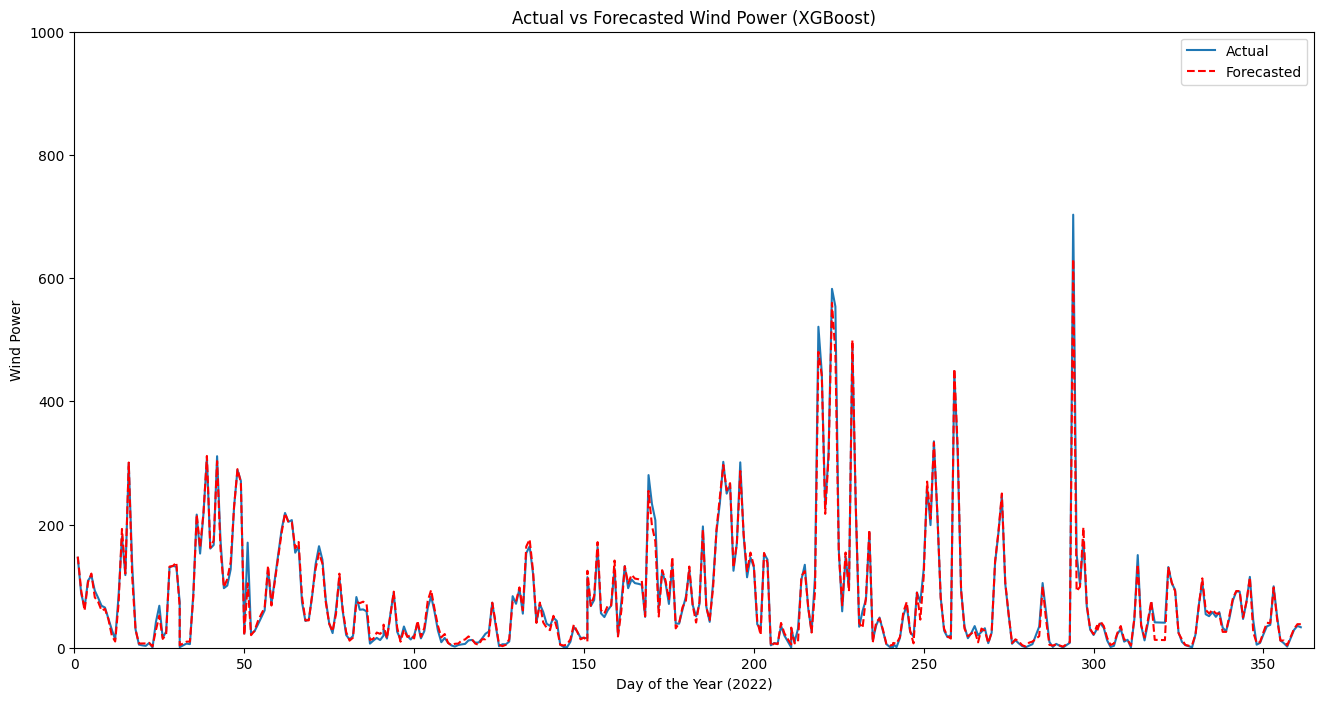

In [6]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics
mape_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Hyperparameter tuning for XGBoost
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    xgb_model = XGBRegressor()
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_cv, y_train_cv)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Initialize XGBoost model with the best hyperparameters
    xgb_model = XGBRegressor(**best_params, random_state=42)

    # Train the model
    xgb_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = xgb_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    mape_list.append(mape)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds
average_mape = np.mean(mape_list)
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)

print('Best Parameters : ',best_params)

print('Validation set scores : ')
print(f"Mean Average Percentage Error (MAPE): {average_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_rmse:.2f}")
print(f"Mean R-squared (R2): {average_r2:.2f}")

# Train the model on the full training set with the best hyperparameters
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics on the test set
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Test set scores : ')
print(f"MAPE on Test Set: {mape:.2f}%")
print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R2 on Test Set: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(16, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (XGBoost)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()


# **Using best hyperparameters**

Validation set scores : 
Mean Average Percentage Error (MAPE): 0.37%
Mean Absolute Error (MAE): 5.90
Mean Squared Error (MSE): 206.54
Root Mean Squared Error (RMSE): 13.94
Mean R-squared (R2): 0.98
Test set scores : 
MAPE on Test Set: 0.25%
MAE on Test Set: 5.34
MSE on Test Set: 89.54
RMSE on Test Set: 9.46
R2 on Test Set: 0.98


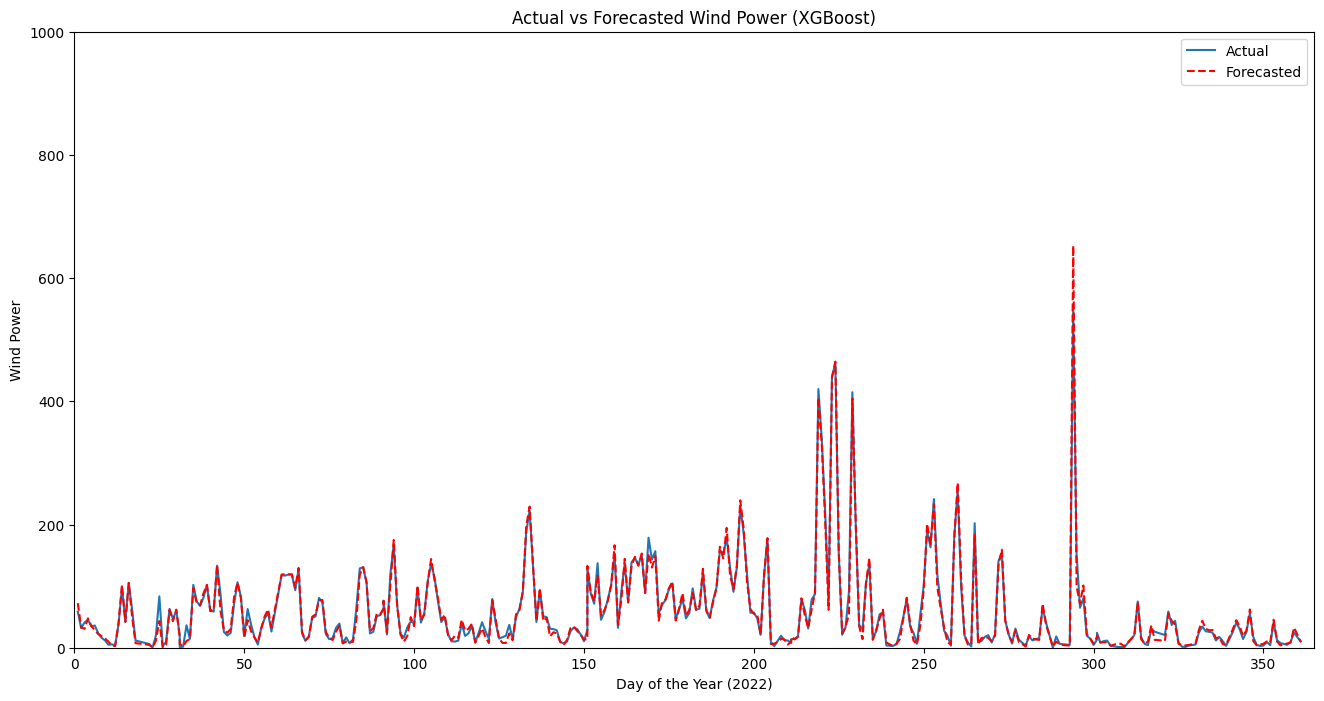

In [10]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Parkay_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize XGBoost model with the best hyperparameters
xgb_model = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.1, random_state=42)

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics
mape_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model
    xgb_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = xgb_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    mape_list.append(mape)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds
average_mape = np.mean(mape_list)
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)

print('Validation set scores : ')
print(f"Mean Average Percentage Error (MAPE): {average_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_rmse:.2f}")
print(f"Mean R-squared (R2): {average_r2:.2f}")

# Train the model on the full training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics on the test set
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Test set scores : ')
print(f"MAPE on Test Set: {mape:.2f}%")
print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R2 on Test Set: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(16, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (XGBoost)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()


# **trained on Inani testing on Mongla**

In [11]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

# Load your Inani dataset
inani_df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Load your Mongla dataset
mongla_df = pd.read_csv('/content/Mongla_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
inani_df = inani_df[inani_df['Avg_Power'] != 0]
mongla_df = mongla_df[mongla_df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
inani_df['DY'] = (inani_df['MO'] - 1) * 30 + inani_df['DY']
mongla_df['DY'] = (mongla_df['MO'] - 1) * 30 + mongla_df['DY']

# Split the Inani data into training and test sets
inani_train_df = inani_df[inani_df['YEAR'] <= 2021]  # Training data: 2013-2021
inani_test_df = inani_df[inani_df['YEAR'] == 2022]  # Test data: 2022

# Split the Mongla data into training and test sets
mongla_train_df = mongla_df[mongla_df['YEAR'] <= 2021]  # Training data: 2013-2021
mongla_test_df = mongla_df[mongla_df['YEAR'] == 2022]  # Test data: 2022

# Define X and y for training and testing
X_inani_train = inani_train_df[features]
y_inani_train = inani_train_df[target]
X_inani_test = inani_test_df[features]
y_inani_test = inani_test_df[target]

X_mongla_train = mongla_train_df[features]
y_mongla_train = mongla_train_df[target]
X_mongla_test = mongla_test_df[features]
y_mongla_test = mongla_test_df[target]

# Initialize XGBoost model with the best hyperparameters
xgb_model = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.1, random_state=42)

# Initialize Time Series Cross-Validation for Inani dataset
tscv_inani = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics
inani_mape_list = []
inani_mae_list = []
inani_mse_list = []
inani_rmse_list = []
inani_r2_list = []

# Perform Time Series Cross-Validation on the Inani dataset
for train_index, test_index in tscv_inani.split(X_inani_train):
    X_train_cv, X_test_cv = X_inani_train.iloc[train_index], X_inani_train.iloc[test_index]
    y_train_cv, y_test_cv = y_inani_train.iloc[train_index], y_inani_train.iloc[test_index]

    # Train the model
    xgb_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = xgb_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    inani_mape_list.append(mape)
    inani_mae_list.append(mae)
    inani_mse_list.append(mse)
    inani_rmse_list.append(rmse)
    inani_r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds for the Inani dataset
average_inani_mape = np.mean(inani_mape_list)
average_inani_mae = np.mean(inani_mae_list)
average_inani_mse = np.mean(inani_mse_list)
average_inani_rmse = np.mean(inani_rmse_list)
average_inani_r2 = np.mean(inani_r2_list)

print('Inani dataset validation scores:')
print(f"Mean Average Percentage Error (MAPE): {average_inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_inani_rmse:.2f}")
print(f"Mean R-squared (R2): {average_inani_r2:.2f}")

# Train the model on the full Inani training set
xgb_model.fit(X_inani_train, y_inani_train)

# Make predictions on the Inani test set
inani_predictions = xgb_model.predict(X_inani_test)

# Calculate evaluation metrics on the Inani test set
inani_mape = mean_absolute_percentage_error(y_inani_test, inani_predictions)
inani_mae = mean_absolute_error(y_inani_test, inani_predictions)
inani_mse = mean_squared_error(y_inani_test, inani_predictions)
inani_rmse = np.sqrt(inani_mse)
inani_r2 = r2_score(y_inani_test, inani_predictions)

print('\nInani dataset test scores:')
print(f"Mean Average Percentage Error (MAPE): {inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {inani_rmse:.2f}")
print(f"Mean R-squared (R2): {inani_r2:.2f}")

# Now, apply the trained model to the Mongla dataset

# Make predictions on the Mongla test set
mongla_predictions = xgb_model.predict(X_mongla_test)

# Calculate evaluation metrics on the Mongla test set
mongla_mape = mean_absolute_percentage_error(y_mongla_test, mongla_predictions)
mongla_mae = mean_absolute_error(y_mongla_test, mongla_predictions)
mongla_mse = mean_squared_error(y_mongla_test, mongla_predictions)
mongla_rmse = np.sqrt(mongla_mse)
mongla_r2 = r2_score(y_mongla_test, mongla_predictions)

print('\nMongla dataset test scores using the model trained on Inani:')
print(f"Mean Average Percentage Error (MAPE): {mongla_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mongla_mae:.2f}")
print(f"Mean Squared Error (MSE): {mongla_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {mongla_rmse:.2f}")
print(f"Mean R-squared (R2): {mongla_r2:.2f}")


Inani dataset validation scores:
Mean Average Percentage Error (MAPE): 0.31%
Mean Absolute Error (MAE): 7.99
Mean Squared Error (MSE): 309.19
Root Mean Squared Error (RMSE): 17.09
Mean R-squared (R2): 0.98

Inani dataset test scores:
Mean Average Percentage Error (MAPE): 0.34%
Mean Absolute Error (MAE): 6.13
Mean Squared Error (MSE): 114.52
Root Mean Squared Error (RMSE): 10.70
Mean R-squared (R2): 0.99

Mongla dataset test scores using the model trained on Inani:
Mean Average Percentage Error (MAPE): 0.20%
Mean Absolute Error (MAE): 5.15
Mean Squared Error (MSE): 60.30
Root Mean Squared Error (RMSE): 7.77
Mean R-squared (R2): 0.99


# **Trained on Inani testing on Parkay**

In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

# Load your Inani dataset
inani_df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Load your Mongla dataset
parkay_df = pd.read_csv('/content/Parkay_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
inani_df = inani_df[inani_df['Avg_Power'] != 0]
parkay_df = parkay_df[parkay_df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
inani_df['DY'] = (inani_df['MO'] - 1) * 30 + inani_df['DY']
parkay_df['DY'] = (parkay_df['MO'] - 1) * 30 + parkay_df['DY']

# Split the Inani data into training and test sets
inani_train_df = inani_df[inani_df['YEAR'] <= 2021]  # Training data: 2013-2021
inani_test_df = inani_df[inani_df['YEAR'] == 2022]  # Test data: 2022

# Split the Mongla data into training and test sets
parkay_train_df = parkay_df[parkay_df['YEAR'] <= 2021]  # Training data: 2013-2021
parkay_test_df = parkay_df[parkay_df['YEAR'] == 2022]  # Test data: 2022

# Define X and y for training and testing
X_inani_train = inani_train_df[features]
y_inani_train = inani_train_df[target]
X_inani_test = inani_test_df[features]
y_inani_test = inani_test_df[target]

X_parkay_train = parkay_train_df[features]
y_parkay_train = parkay_train_df[target]
X_parkay_test = parkay_test_df[features]
y_parkay_test = parkay_test_df[target]

xgb_model = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.1,random_state=42)

# Initialize Time Series Cross-Validation for Inani dataset
tscv_inani = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics
inani_mape_list = []
inani_mae_list = []
inani_mse_list = []
inani_rmse_list = []
inani_r2_list = []

# Perform Time Series Cross-Validation on the Inani dataset
for train_index, test_index in tscv_inani.split(X_inani_train):
    X_train_cv, X_test_cv = X_inani_train.iloc[train_index], X_inani_train.iloc[test_index]
    y_train_cv, y_test_cv = y_inani_train.iloc[train_index], y_inani_train.iloc[test_index]

    # Train the model
    xgb_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = xgb_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    inani_mape_list.append(mape)
    inani_mae_list.append(mae)
    inani_mse_list.append(mse)
    inani_rmse_list.append(rmse)
    inani_r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds for the Inani dataset
average_inani_mape = np.mean(inani_mape_list)
average_inani_mae = np.mean(inani_mae_list)
average_inani_mse = np.mean(inani_mse_list)
average_inani_rmse = np.mean(inani_rmse_list)
average_inani_r2 = np.mean(inani_r2_list)

print('Inani dataset validation scores:')
print(f"Mean Average Percentage Error (MAPE): {average_inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_inani_rmse:.2f}")
print(f"Mean R-squared (R2): {average_inani_r2:.2f}")

# Train the model on the full Inani training set
xgb_model.fit(X_inani_train, y_inani_train)

# Make predictions on the Inani test set
inani_predictions = xgb_model.predict(X_inani_test)

# Calculate evaluation metrics on the Inani test set
inani_mape = mean_absolute_percentage_error(y_inani_test, inani_predictions)
inani_mae = mean_absolute_error(y_inani_test, inani_predictions)
inani_mse = mean_squared_error(y_inani_test, inani_predictions)
inani_rmse = np.sqrt(inani_mse)
inani_r2 = r2_score(y_inani_test, inani_predictions)

print('\nInani dataset test scores:')
print(f"Mean Average Percentage Error (MAPE): {inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {inani_rmse:.2f}")
print(f"Mean R-squared (R2): {inani_r2:.2f}")

# Now, apply the trained model to the Mongla dataset

# Make predictions on the Mongla test set
parkay_predictions = xgb_model.predict(X_parkay_test)

# Calculate evaluation metrics on the Mongla test set
parkay_mape = mean_absolute_percentage_error(y_parkay_test, parkay_predictions)
parkay_mae = mean_absolute_error(y_parkay_test, parkay_predictions)
parkay_mse = mean_squared_error(y_parkay_test, parkay_predictions)
parkay_rmse = np.sqrt(parkay_mse)
parkay_r2 = r2_score(y_parkay_test, parkay_predictions)

print('\nParkay dataset test scores using the model trained on Inani:')
print(f"Mean Average Percentage Error (MAPE): {parkay_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {parkay_mae:.2f}")
print(f"Mean Squared Error (MSE): {parkay_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {parkay_rmse:.2f}")
print(f"Mean R-squared (R2): {parkay_r2:.2f}")


Inani dataset validation scores:
Mean Average Percentage Error (MAPE): 0.31%
Mean Absolute Error (MAE): 7.99
Mean Squared Error (MSE): 309.19
Root Mean Squared Error (RMSE): 17.09
Mean R-squared (R2): 0.98

Inani dataset test scores:
Mean Average Percentage Error (MAPE): 0.34%
Mean Absolute Error (MAE): 6.13
Mean Squared Error (MSE): 114.52
Root Mean Squared Error (RMSE): 10.70
Mean R-squared (R2): 0.99

Parkay dataset test scores using the model trained on Inani:
Mean Average Percentage Error (MAPE): 0.28%
Mean Absolute Error (MAE): 5.70
Mean Squared Error (MSE): 71.51
Root Mean Squared Error (RMSE): 8.46
Mean R-squared (R2): 0.99
